In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

PATH_DATA = os.getcwd() + '/Data/'

TYPES = dtypes = {
    'Year': 'int64',
    'Day': int,
    'Hour': int,
    'Minute': int,
    'BX': float, 
    'BY': float,
    'BZ': float,
    'Vx_Velocity': float,
    'Vy_Velocity': float,
    'Vz_Velocity': float,
    'SYM/D': int,
    'SYM/H': int,
    'ASY/D': int,
    'ASY/H': int }

os.listdir(PATH_DATA)

['omni_min_def_20230101_20230331.lst',
 'omni_min_20230101_20230331.gif',
 'omni_min_20230401_20230630.gif',
 'july_september.csv',
 'omni_min_20231001_20231231.gif',
 '.ipynb_checkpoints',
 'april_jun.csv',
 'FULL_DATA.csv',
 'full_data.csv',
 'omni_min_def_20231001_20231010.lst',
 'january_march.csv',
 'october.csv',
 'omni_min_def_20230401_20230630.lst',
 'omni_min_20230701_20230930.gif',
 'omni_min_def_20230701_20230930.lst']

In [64]:
def define_types(word):
    if(word.isnumeric() or word.replace('-','').isnumeric()): return int(word)
    elif(word == '<NA>'): return pd.NA
    #elif(not word.isnumeric() and word.isalnum()): return str(word)
    else: return float(word)
filt_types = lambda _list: list(map(define_types, _list))

In [71]:
type(None)
pd.NA

<NA>

In [66]:
[type(e) for e in (filt_types(['1', '0', '-22', '3.3', '<NA>', '-3.3']))]

[int, int, int, float, pandas._libs.missing.NAType, float]

In [60]:
import csv

def convert_lst_to_csv(lst_file_path, csv_file_path, mode_='w', header=False):
    '''
    Конвертер файла из типа *.lst в *.csv
    '''
    with open(lst_file_path, 'r') as lst_file:
        ''' Выполните здесь необходимую обработку данных из файла .lst
        и сохраните результаты в виде списка списков.'''
        
        row_data = lst_file.readlines()
        
        # Если нужно убрать дефектные значения из данных
        cond_9999 = lambda word: word != 99999.9 and word != 9999.99 and word != 99999
        replace_9999 = lambda word: word if cond_9999(word) else np.nan
        filt_9999 = lambda _list: list(map(replace_9999, _list))
        
        def define_types(word):
            if(word.isnumeric()): return int(word)
            elif(not word.isnumeric() and word.isalnum()): return str(word)
            else: return float(word)
        filt_types = lambda _list: list(map(define_types, _list))
        
        results = [filt_9999(filt_types(line.split())) for line in row_data]
        
    with open(csv_file_path, mode=mode_, encoding='UTF8', newline='') as csv_file:
        writer = csv.writer(csv_file)
        if header:
            writer.writerow(list(TYPES.keys()))
        writer.writerows(results)
    
    if mode_=='w':
        print(f"Файл успешно конвертирован в формат CSV и сохранен по пути: {csv_file_path}")
    elif mode_=='a':
        print(f"Файл успешно конвертирован и дописан: {csv_file_path}")
    



january_march, april_jun, july_september, october = ['omni_min_def_20230101_20230331.lst',
                                                     'omni_min_def_20230401_20230630.lst',
                                                     'omni_min_def_20230701_20230930.lst',
                                                     'omni_min_def_20231001_20231010.lst']

path_1 = PATH_DATA + january_march
path_2 = PATH_DATA + april_jun
path_3 = PATH_DATA + july_september
path_4 = PATH_DATA + october

# Укажите путь для сохранения файла .csv
csv_file_path = PATH_DATA + "january_march.csv"

# Вызов функции для выполнения конвертации
#convert_lst_to_csv(path_1, csv_file_path, mode_='w', header=True)

# Создание полного набора данных
csv_file_path = PATH_DATA + "FULL_DATA.csv"
convert_lst_to_csv(path_2, csv_file_path, mode_='w', header=True)
convert_lst_to_csv(path_3, csv_file_path, mode_='a')
convert_lst_to_csv(path_4, csv_file_path, mode_='a')

Файл успешно конвертирован в формат CSV и сохранен по пути: /home/oplora/Documents/VMK/Dissertation/Magfield/Data/FULL_DATA.csv
Файл успешно конвертирован и дописан: /home/oplora/Documents/VMK/Dissertation/Magfield/Data/FULL_DATA.csv
Файл успешно конвертирован и дописан: /home/oplora/Documents/VMK/Dissertation/Magfield/Data/FULL_DATA.csv


https://numpy.org/devdocs/user/basics.types.html - number types

In [61]:
df1 = pd.read_csv(PATH_DATA + "january_march.csv", dtype=TYPES)
df2 = pd.read_csv(PATH_DATA + "april_jun.csv", dtype=TYPES)
df3 = pd.read_csv(PATH_DATA + "july_september.csv", dtype=TYPES)
df4 = pd.read_csv(PATH_DATA + "october.csv")
df = pd.read_csv(PATH_DATA + "FULL_DATA.csv")

In [62]:
print(df.dtypes)    

Year             int64
Day              int64
Hour             int64
Minute           int64
BX             float64
BY             float64
BZ             float64
Vx_Velocity    float64
Vy_Velocity    float64
Vz_Velocity    float64
SYM/D          float64
SYM/H          float64
ASY/D          float64
ASY/H          float64
dtype: object


In [63]:
df1

,Year,Day,Hour,Minute,BX,BY,BZ,Vx_Velocity,Vy_Velocity,Vz_Velocity,SYM/D,SYM/H,ASY/D,ASY/H
0,2023,1,0,0,-3.70,2.97,-0.96,NaN,NaN,NaN,-1,-21,18,35
1,2023,1,0,1,-2.80,4.24,0.64,-593.8,-16.4,-42.6,-1,-21,17,34
2,2023,1,0,2,-3.26,3.57,-0.71,-586.9,-12.7,-28.3,-1,-21,16,35
3,2023,1,0,3,-3.71,3.23,-0.12,-583.8,-11.5,-10.6,-1,-21,15,35
4,2023,1,0,4,-3.97,3.31,0.60,-585.8,-12.9,-44.5,-1,-21,16,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129595,2023,90,23,55,2.68,-4.37,-0.89,-465.3,-42.6,-31.0,0,-8,25,15
129596,2023,90,23,56,2.48,-4.13,-1.47,NaN,NaN,NaN,0,-8,24,14
129597,2023,90,23,57,2.43,-4.05,-1.84,NaN,NaN,NaN,0,-8,25,13
129598,2023,90,23,58,2.32,-3.52,-0.61,NaN,NaN,NaN,0,-8,25,13


In [64]:
df2

,Year,Day,Hour,Minute,BX,BY,BZ,Vx_Velocity,Vy_Velocity,Vz_Velocity,SYM/D,SYM/H,ASY/D,ASY/H
0,2023,1,0,0,-3.70,2.97,-0.96,NaN,NaN,NaN,-1,-21,18,35
1,2023,1,0,1,-2.80,4.24,0.64,-593.8,-16.4,-42.6,-1,-21,17,34
2,2023,1,0,2,-3.26,3.57,-0.71,-586.9,-12.7,-28.3,-1,-21,16,35
3,2023,1,0,3,-3.71,3.23,-0.12,-583.8,-11.5,-10.6,-1,-21,15,35
4,2023,1,0,4,-3.97,3.31,0.60,-585.8,-12.9,-44.5,-1,-21,16,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129595,2023,90,23,55,2.68,-4.37,-0.89,-465.3,-42.6,-31.0,0,-8,25,15
129596,2023,90,23,56,2.48,-4.13,-1.47,NaN,NaN,NaN,0,-8,24,14
129597,2023,90,23,57,2.43,-4.05,-1.84,NaN,NaN,NaN,0,-8,25,13
129598,2023,90,23,58,2.32,-3.52,-0.61,NaN,NaN,NaN,0,-8,25,13


In [65]:
df3

,Year,Day,Hour,Minute,BX,BY,BZ,Vx_Velocity,Vy_Velocity,Vz_Velocity,SYM/D,SYM/H,ASY/D,ASY/H
0,2023,182,0,0,-4.60,3.29,4.00,-510.7,24.5,-9.7,0,-14,22,16
1,2023,182,0,1,-3.80,4.30,3.74,NaN,NaN,NaN,0,-14,23,16
2,2023,182,0,2,-3.96,3.61,4.19,NaN,NaN,NaN,0,-14,23,16
3,2023,182,0,3,-3.59,4.45,3.70,NaN,NaN,NaN,0,-14,24,16
4,2023,182,0,4,-3.15,4.05,3.14,NaN,NaN,NaN,0,-12,24,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132475,2023,273,23,55,NaN,NaN,NaN,NaN,NaN,NaN,-12,-31,29,35
132476,2023,273,23,56,NaN,NaN,NaN,NaN,NaN,NaN,-12,-32,29,36
132477,2023,273,23,57,NaN,NaN,NaN,NaN,NaN,NaN,-13,-32,29,38
132478,2023,273,23,58,NaN,NaN,NaN,NaN,NaN,NaN,-12,-33,28,39


In [66]:
df4

,Year,Day,Hour,Minute,BX,BY,BZ,Vx_Velocity,Vy_Velocity,Vz_Velocity,SYM/D,SYM/H,ASY/D,ASY/H
0,2023,274,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023,274,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023,274,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023,274,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023,274,0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14395,2023,283,23,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14396,2023,283,23,56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14397,2023,283,23,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14398,2023,283,23,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
df

,Year,Day,Hour,Minute,BX,BY,BZ,Vx_Velocity,Vy_Velocity,Vz_Velocity,SYM/D,SYM/H,ASY/D,ASY/H
0,2023,1,0,0,-3.70,2.97,-0.96,NaN,NaN,NaN,-1.0,-21.0,18.0,35.0
1,2023,1,0,1,-2.80,4.24,0.64,-593.8,-16.4,-42.6,-1.0,-21.0,17.0,34.0
2,2023,1,0,2,-3.26,3.57,-0.71,-586.9,-12.7,-28.3,-1.0,-21.0,16.0,35.0
3,2023,1,0,3,-3.71,3.23,-0.12,-583.8,-11.5,-10.6,-1.0,-21.0,15.0,35.0
4,2023,1,0,4,-3.97,3.31,0.60,-585.8,-12.9,-44.5,-1.0,-21.0,16.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276475,2023,283,23,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276476,2023,283,23,56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276477,2023,283,23,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276478,2023,283,23,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

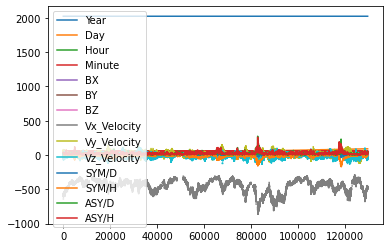

In [72]:
df1.plot()

<AxesSubplot:>

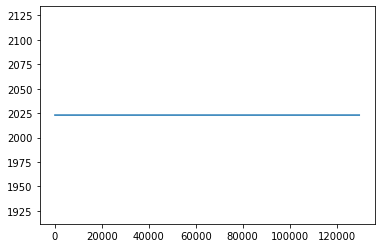

In [73]:
df1["Year"].plot()

<AxesSubplot:>

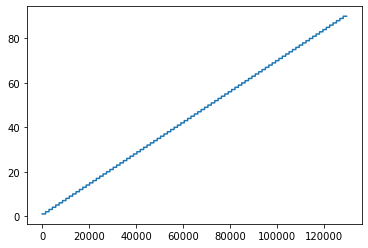

In [74]:
df1["Day"].plot()

<AxesSubplot:>

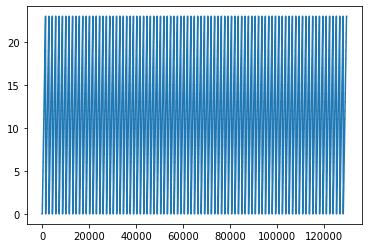

In [75]:
df1["Hour"].plot()

<AxesSubplot:>

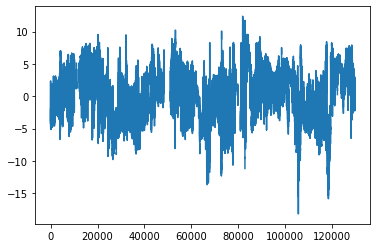

In [78]:
df1["BX"].plot()
